# Traitement/clean

In [38]:
#import des biblios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as pyplot
import os
from google.colab import drive

In [39]:
#lecture du fichier
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/")
stars = pd.read_csv("total_stars.csv",sep=',')
stars.head(500)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0.1,Star_name,Distance,Mass,Radius,Luminosity,Unnamed: 6,Unnamed: 0,Star_name.1,Distance.1,Mass.1,Radius.1
0,0,Sun,0.000015813,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sirius,0008.6,2.1,1.71Â´,25.4,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Canopus,0310,15,71,"13,500",NaN,NaN,NaN,NaN,NaN,NaN
3,3,Alpha Centauri,0004.4,1.1,1.2,2,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Arcturus,0037,1.1,26,170,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
248,187,187,2MASSI J2356547-155310,74.0,0.07636704,0.11201167000000001,NaN,NaN,NaN,NaN,NaN,NaN
249,225,225,WISE 0410+1502,20.0,0.005727528,0.12023270999999998,NaN,NaN,NaN,NaN,NaN,NaN
250,229,229,WISE 0458+6434A,35.9,0.014318820000000001,0.4316046,NaN,NaN,NaN,NaN,NaN,NaN
251,230,230,WISE 0458+6434B,35.9,0.00954588,0.39049939999999994,NaN,NaN,NaN,NaN,NaN,NaN


# Modif csv

In [40]:
df = stars[['Star_name','Distance','Mass', 'Radius','Luminosity']]
indice_entier = df[df.iloc[:, 0].astype(str).str.isdigit()].index[0]

df_partie1 = df.iloc[:indice_entier, :]
df_partie2 = df.iloc[indice_entier:, :]

df_partie2 = df_partie2.shift(axis=1, periods=-1, fill_value=None)

df = pd.concat([df_partie1, df_partie2], ignore_index=True)
df = df.drop('Luminosity', axis=1)

df

,Star_name,Distance,Mass,Radius
0,Sun,0.000015813,1,1
1,Sirius,0008.6,2.1,1.71Â´
2,Canopus,0310,15,71
3,Alpha Centauri,0004.4,1.1,1.2
4,Arcturus,0037,1.1,26
...,...,...,...,...
248,2MASSI J2356547-155310,74.0,0.07636704,0.11201167000000001
249,WISE 0410+1502,20.0,0.005727528,0.12023270999999998
250,WISE 0458+6434A,35.9,0.014318820000000001,0.4316046
251,WISE 0458+6434B,35.9,0.00954588,0.39049939999999994


# Clean


In [41]:
# Convertir 'Distance' en nombre
df['Distance'] = pd.to_numeric(df['Distance'], errors='coerce')

# Définir une fonction pour nettoyer et convertir en nombre
def clean_and_convert_to_float(value):
    # Supprimer les caractères non numériques
    numeric_chars = ''.join(char for char in str(value) if char.isdigit() or char in {'.', ','})
    # Remplacer ',' par '.' pour gérer les décimales
    numeric_chars = numeric_chars.replace(',', '.')
    try:
        return float(numeric_chars)
    except ValueError:
        return float('nan')

# Appliquer la fonction sur les colonnes 'Mass', 'Radius', et 'Distance'
df['Mass'] = df['Mass'].apply(clean_and_convert_to_float)
df['Radius'] = df['Radius'].apply(clean_and_convert_to_float)

# Convertir 'Star_name' en chaîne de caractères
df['Star_name'] = df['Star_name'].astype(str)

# Supprimer les lignes avec des valeurs manquantes
df = df.dropna()


df

,Star_name,Distance,Mass,Radius
0,Sun,0.000016,1.000000,1.000000
1,Sirius,8.600000,2.100000,1.710000
2,Canopus,310.000000,15.000000,71.000000
3,Alpha Centauri,4.400000,1.100000,1.200000
4,Arcturus,37.000000,1.100000,26.000000
...,...,...,...,...
248,2MASSI J2356547-155310,74.000000,0.076367,0.112012
249,WISE 0410+1502,20.000000,0.005728,0.120233
250,WISE 0458+6434A,35.900000,0.014319,0.431605
251,WISE 0458+6434B,35.900000,0.009546,0.390499


# Regroument,entrainement,affichage


In [42]:
df_features = df[['Mass', 'Distance', 'Radius']]

<ipython-input-43-918f5aa0652b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns_to_normalize] = scaler.fit_transform(df.loc[:, columns_to_normalize])
<ipython-input-43-918f5aa0652b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expli

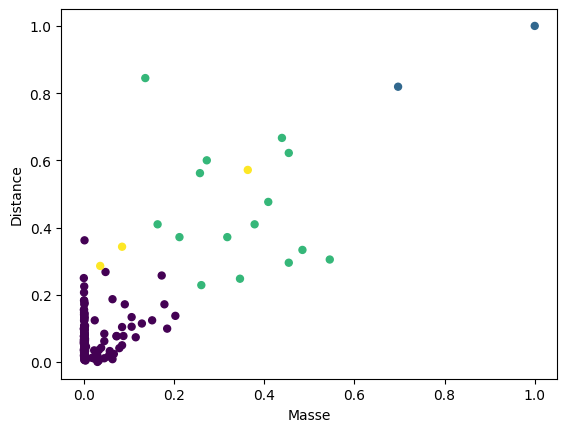

In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Supposons que vous avez un DataFrame 'df' avec les caractéristiques et 'columns_to_normalize'
columns_to_normalize = ['Mass', 'Distance', 'Radius']

# Création d'une instance du MinMaxScaler
scaler = MinMaxScaler()

# Normalisation des colonnes sélectionnées dans le DataFrame df
df.loc[:, columns_to_normalize] = scaler.fit_transform(df.loc[:, columns_to_normalize])

# Attribuer des noms de colonnes après la normalisation
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
scaled_features = df[columns_to_normalize]
scaled_features.columns = [f"{col}_scaled" for col in columns_to_normalize]

# Choix du modèle de clustering
kmeans = KMeans(n_clusters=4, random_state=42)

# Entraînement du modèle K-Means
kmeans.fit(scaled_features)

# Utilisation des colonnes normalisées pour l'entraînement du modèle KMeans
df['Cluster'] = kmeans.labels_

# Visualisation des résultats
plt.scatter(df['Mass'], df['Distance'], c=df['Cluster'], cmap='viridis', s=25)
plt.xlabel('Masse')
plt.ylabel('Distance')
plt.show()


In [44]:
# Caractéristiques de la nouvelle étoile
new_star_features = [4.0, 101, 3.4]

# Normalisation des caractéristiques de la nouvelle étoile
scaled_new_star = scaler.transform([new_star_features])

# Prédiction du groupe auquel appartient la nouvelle étoile
predicted_cluster = kmeans.predict(scaled_new_star)

# Affichage du résultat
print(f"La nouvelle étoile appartient au groupe : {predicted_cluster[0]}")

# Comptage du nombre d'étoiles déjà dans ce groupe dans l'ensemble d'entraînement
stars_in_predicted_cluster = train_df[train_df['Cluster'] == predicted_cluster[0]]
count_stars_in_predicted_cluster = len(stars_in_predicted_cluster)

print(f"Il y a déjà {count_stars_in_predicted_cluster} étoiles dans ce groupe.")


La nouvelle étoile appartient au groupe : 1
Il y a déjà 2 étoiles dans ce groupe.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
